In [2]:
import os
import cv2
import h5py
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob
from sklearn.preprocessing import LabelEncoder

### csv, folder 구분

In [3]:
# 사용할 데이터셋의 경로를 입력
PATH = 'Datasets/butterfly'
image_folder = []
csv_file = []

for path in os.listdir(PATH):
    if ".csv" in path:
        csv_file.append(path)
    else:
        image_folder.append(path)

### test, train 데이터셋 구분

In [4]:
file_path = dict()

for csv, folder in zip(csv_file, image_folder):
    if "Training" in csv:
        file_path["train_path"] = os.path.join(PATH, csv)
    else:
        file_path["test_path"] = os.path.join(PATH, csv)
    
    if folder == "train":
        file_path["train_img"] = os.path.join(PATH, folder)
    else:
        file_path["test_img"] = os.path.join(PATH, folder)

### csv 파일 로드

In [5]:
train_csv = pd.read_csv(file_path['train_path'], encoding='utf-8')
test_csv = pd.read_csv(file_path['test_path'], encoding='utf-8')

In [6]:
display(train_csv.head())
display(test_csv.head())

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [7]:
print(f"Train data shape: {train_csv.shape}")
print(f"Label unique count: {len(train_csv['label'].unique())}")
print(f"Test data shape: {test_csv.shape}")

Train data shape: (6499, 2)
Label unique count: 75
Test data shape: (2786, 1)


### 파일 경로 저장하기

In [8]:
train_img_path = []
test_img_path = []

for train_img in train_csv['filename']:
    train_img_path.append(os.path.join(file_path['train_img'], train_img))
    
for test_img in test_csv['filename']:
    test_img_path.append(os.path.join(file_path['test_img'], test_img))

print(f"Train image path count : {len(train_img_path)}")
print(f"Test image path count : {len(test_img_path)}")

Train image path count : 6499
Test image path count : 2786


### cv2(opencv) 라이브러리를 통해 image파일 저장

In [9]:
train_data = []
test_data = []

for train_img in train_img_path:
    img = cv2.imread(train_img, cv2.IMREAD_COLOR_RGB)
    train_data.append(img)

for test_img in test_img_path:
    img = cv2.imread(test_img, cv2.IMREAD_COLOR_RGB)
    test_data.append(img)
    
train_data = np.array(train_data)
test_data = np.array(test_data)

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

KeyboardInterrupt: 

In [10]:
# train_data의 마지막 열(label)을 추출,
train_label = train_csv.iloc[:, -1].to_numpy()

# 객체 생성
le = LabelEncoder()

# 학습 -> le_fit.classes_에 label들이 고유값으로 오름차순으로 정렬됨
le_fit = le.fit(train_label)

# key: 인덱스, value: 라벨값으로 저장
train_classes = {num: name for num, name in enumerate(le_fit.classes_)}

# 문자열로 된 label들을 숫자(인덱스)로 encoding해 저장
train_label = le_fit.transform(train_label)

print(train_classes)
print(train_label[4], train_label[6])
# Image_5.jpg,GREEN CELLED CATTLEHEART, Image_7.jpg,GREEN CELLED CATTLEHEART

{0: 'ADONIS', 1: 'AFRICAN GIANT SWALLOWTAIL', 2: 'AMERICAN SNOOT', 3: 'AN 88', 4: 'APPOLLO', 5: 'ATALA', 6: 'BANDED ORANGE HELICONIAN', 7: 'BANDED PEACOCK', 8: 'BECKERS WHITE', 9: 'BLACK HAIRSTREAK', 10: 'BLUE MORPHO', 11: 'BLUE SPOTTED CROW', 12: 'BROWN SIPROETA', 13: 'CABBAGE WHITE', 14: 'CAIRNS BIRDWING', 15: 'CHECQUERED SKIPPER', 16: 'CHESTNUT', 17: 'CLEOPATRA', 18: 'CLODIUS PARNASSIAN', 19: 'CLOUDED SULPHUR', 20: 'COMMON BANDED AWL', 21: 'COMMON WOOD-NYMPH', 22: 'COPPER TAIL', 23: 'CRECENT', 24: 'CRIMSON PATCH', 25: 'DANAID EGGFLY', 26: 'EASTERN COMA', 27: 'EASTERN DAPPLE WHITE', 28: 'EASTERN PINE ELFIN', 29: 'ELBOWED PIERROT', 30: 'GOLD BANDED', 31: 'GREAT EGGFLY', 32: 'GREAT JAY', 33: 'GREEN CELLED CATTLEHEART', 34: 'GREY HAIRSTREAK', 35: 'INDRA SWALLOW', 36: 'IPHICLUS SISTER', 37: 'JULIA', 38: 'LARGE MARBLE', 39: 'MALACHITE', 40: 'MANGROVE SKIPPER', 41: 'MESTRA', 42: 'METALMARK', 43: 'MILBERTS TORTOISESHELL', 44: 'MONARCH', 45: 'MOURNING CLOAK', 46: 'ORANGE OAKLEAF', 47: 'ORANG

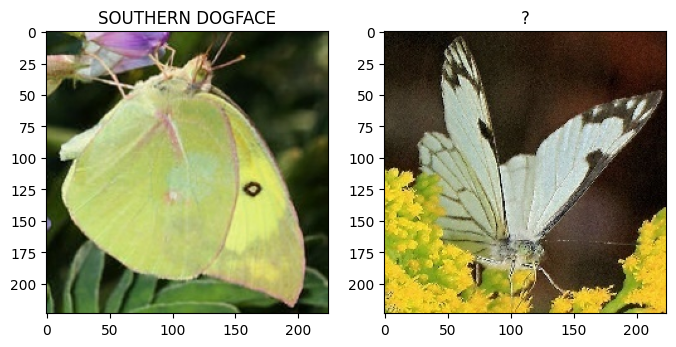

In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(train_data[0])
plt.title(train_classes[train_label[0]])

plt.subplot(122)
plt.imshow(test_data[0])
plt.title("?")

plt.show()

### 데이터셋 저장

In [ ]:
with h5py.File('butterfly_original.hdf5', 'w') as hf:
    hf.create_dataset("train_data", data=train_data)
    hf.create_dataset("train_label", data=train_label)
    hf.create_dataset("test_data", data=test_data)
    
with open('butterfly_original_classes.json', 'w') as j:
    json.dump(train_classes, j)

### 저장된 데이터셋 불러오기

In [ ]:
with h5py.File('butterfly_original.hdf5', 'r') as hf:
    train_data = hf['train_data'][:]
    train_label = hf['train_label'][:]
    test_data = hf['test_data'][:]

with open("butterfly_original_classes.json", 'r') as j:
    train_classes = json.load(j)

In [ ]:
train_classes

{'0': 'ADONIS',
 '1': 'AFRICAN GIANT SWALLOWTAIL',
 '2': 'AMERICAN SNOOT',
 '3': 'AN 88',
 '4': 'APPOLLO',
 '5': 'ATALA',
 '6': 'BANDED ORANGE HELICONIAN',
 '7': 'BANDED PEACOCK',
 '8': 'BECKERS WHITE',
 '9': 'BLACK HAIRSTREAK',
 '10': 'BLUE MORPHO',
 '11': 'BLUE SPOTTED CROW',
 '12': 'BROWN SIPROETA',
 '13': 'CABBAGE WHITE',
 '14': 'CAIRNS BIRDWING',
 '15': 'CHECQUERED SKIPPER',
 '16': 'CHESTNUT',
 '17': 'CLEOPATRA',
 '18': 'CLODIUS PARNASSIAN',
 '19': 'CLOUDED SULPHUR',
 '20': 'COMMON BANDED AWL',
 '21': 'COMMON WOOD-NYMPH',
 '22': 'COPPER TAIL',
 '23': 'CRECENT',
 '24': 'CRIMSON PATCH',
 '25': 'DANAID EGGFLY',
 '26': 'EASTERN COMA',
 '27': 'EASTERN DAPPLE WHITE',
 '28': 'EASTERN PINE ELFIN',
 '29': 'ELBOWED PIERROT',
 '30': 'GOLD BANDED',
 '31': 'GREAT EGGFLY',
 '32': 'GREAT JAY',
 '33': 'GREEN CELLED CATTLEHEART',
 '34': 'GREY HAIRSTREAK',
 '35': 'INDRA SWALLOW',
 '36': 'IPHICLUS SISTER',
 '37': 'JULIA',
 '38': 'LARGE MARBLE',
 '39': 'MALACHITE',
 '40': 'MANGROVE SKIPPER',
 '41': '